# Simple Layer model to study simple reflections 

In order to __"run"__ the Jupyter Notebook's code cells once you clicked on them just press __"Shift+Enter"__

You can download gprMax from www.gprmax.com and install it on your computer but you do not have to do this for this course. Experimenting with simple GPR models can be done with the Jupyter Notebooks without needing to do too much - hopefully none! - of difficult programming steps. 

A lot of information and documentation exist on the gprMax website and if you want to explore further you can get in touch via the discussion board or chat message or email. 

Please __do consult the extensive documentation__ for more details.

Download and install gprMax on Noteable. __This step needs to be performed only once__. 
Once created, Noteable will not delete the gprMax folder.

The easiest way to do this is to open a terminal window and type the following commands one at a time pressing enter after each of them.
```
git clone https://github.com/gprMax/gprMax.git ~/gprMax
cd ~/gprMax
python setup.py build 
python setup.py install 
```


First we always execute the following cell to setup things. It might take a while and you will see a star in the brackets that means it is running ...

In [95]:
run ../setup/preamble.ipynb

gprMax has been added to session!


Let us consider a simple 2D model. We assume that $z$-direction is infinite long and in the model it only has one cell width. So, let us consider an $x-y$ model of 0.3 metres by 0.3 metres and a spatial step of $\Delta x = \Delta y =$ 0.002 metres.

We initially setup the source and receiver at the centre of the model over a half space of a simple material like sand and we will set the relative permiitivty of it to $\epsilon_r$ = 4. We also will assume that there are no boundaries to this model for our waves and so absorbing boundaries are used by default around the edges of our numerical grid.

We will then create a flat layer at a depth of about 0.2 metres from the surface with another material which intiially will assumed to be a perfect electric conductor (pec). gprMax knows about a __pec__ material and we do not need the properties of it. Similarly it knows about free space properties as well!

We will run the model for a simulated time of 7 nanoseconds and use a Hertzian dipole source - which in a 2D model is a infinite line source - with a centre frequency of 2000 MHz and amplitutde 1. The current waveform of this source has the shape of a ricker wavelet.

We will call this model __simplelayer.in__ and we can save this file using the cell below

In [109]:
%%writefile simplelayer.in
#title: My simple layer model
#domain: 0.3 0.3 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 7e-9
#messages: y
#num_threads: 1 

#material: 4 0 1 0 sand

#waveform: ricker 1 2000e6 mypulse
#hertzian_dipole: z 0.13 0.252 0 mypulse
#rx: 0.17 0.252 0

#box: 0 0 0 0.3 0.25 0.002 sand
#box: 0 0 0 0.3 0.05 0.002 pec

#geometry_view: 0 0 0 0.3 0.3 0.002 0.002 0.002 0.002 simplelayer n 

Overwriting simplelayer.in


We can see the input file we generated running the cell below!

In [110]:
# View input file for gprMax

view_file('simplelayer.in')

#title: My simple layer model
#domain: 0.3 0.3 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 7e-9
#messages: y
#num_threads: 1 

#material: 4 0 1 0 sand

#waveform: ricker 1 2000e6 mypulse
#hertzian_dipole: z 0.13 0.252 0 mypulse
#rx: 0.17 0.252 0

#box: 0 0 0 0.3 0.25 0.002 sand
#box: 0 0 0 0.3 0.05 0.002 pec

#geometry_view: 0 0 0 0.3 0.3 0.002 0.002 0.002 0.002 simplelayer n 



We are ready to run the model using our input file as an argument to the gprMax program

In [111]:
!python -m gprMax simplelayer.in 


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2022: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

We can also see the geometry of our model to make sure it looks OK! Remember the extension of a geometry file produced by gprMax is __.vti__

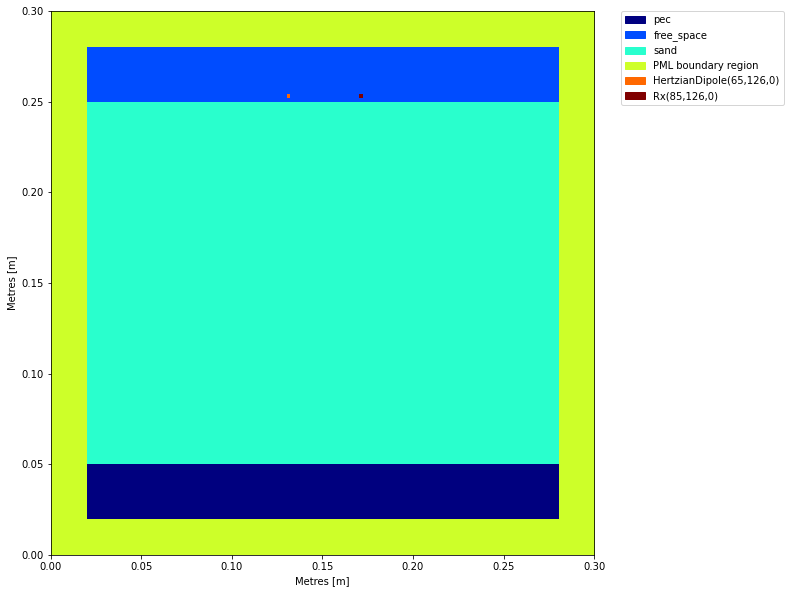

In [105]:
# View the 2D gprMax model to see if it is OK

gprMax_model('simplelayer.vti')

Once we have run our model let us see the output! We want to see the first output point and the Ez component which is the same direction as our source. The following function will give us the modelled GPR trace, a time vector useful for plotting and the position in model space of this output point

In [112]:
# Get output A-scan data
# dataVector, time, receiverPosition = gprMax_Ascan(filename, rx, rxcomponent)

Ascan, time, pos = gprMax_Ascan('simplelayer.out', 1, 'Ez')

Then we are ready to plot the result!!! 

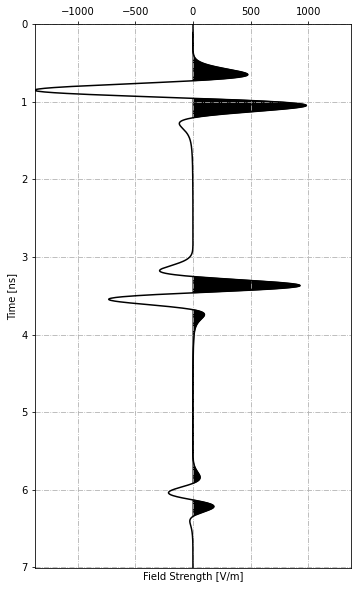

In [113]:
# Plot A-scan - plot_Ascan(trace, time_vector, rotate)

plot_Ascan(Ascan, time, rotate = False)

### Can you introduce another material and replace the __pec__ material with it and see how the strength and the shape of the relfection changes?

Remember that the simple reflection coefficient R for a 1D normal incidence pulse in a lossless medium is $R = \frac{\sqrt{\epsilon_{r_1}}-\sqrt{\epsilon_{r_2}}}{\sqrt{\epsilon_{r_1}}+\sqrt{\epsilon_{r_2}}}$ The reflection coefficient for a perfect electric conductor (pec) is -1.


### What causes the second smaller reflection? Is it always there? What you observe for different materials?

(Hint: If we don't see something in our simple plots does it mean it is defenetely not there?)

### What happens when small amounts of conductivity $\sigma$ is introduced? Could we have reflections only due to conducticvity? 